<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nonlinear Classification 
#### Farius Tjioesman September 5 2020

Trying to illustrate the rbf kernel, non linear classification from Machine Learning course from Nick below by using simple code below to understand the importance of bigger gamma values to wrap the group of data clusters.

Sample distances are randomized 10% max from original functions. Slider animation reuses previously selected randomized sample unless the whole code to be re-run.

At below case linear regression lines (that divide blue and red clusters at gamma = 0.0001) slowly wraps up the the red datas starting from gamma value 0.0004 or bigger.

Interactive GUI from ipywidgets is used to animate the classification progress from lower gamma (0.0001) to higher gamma (0.01) within the slider scale of 0 to 100.

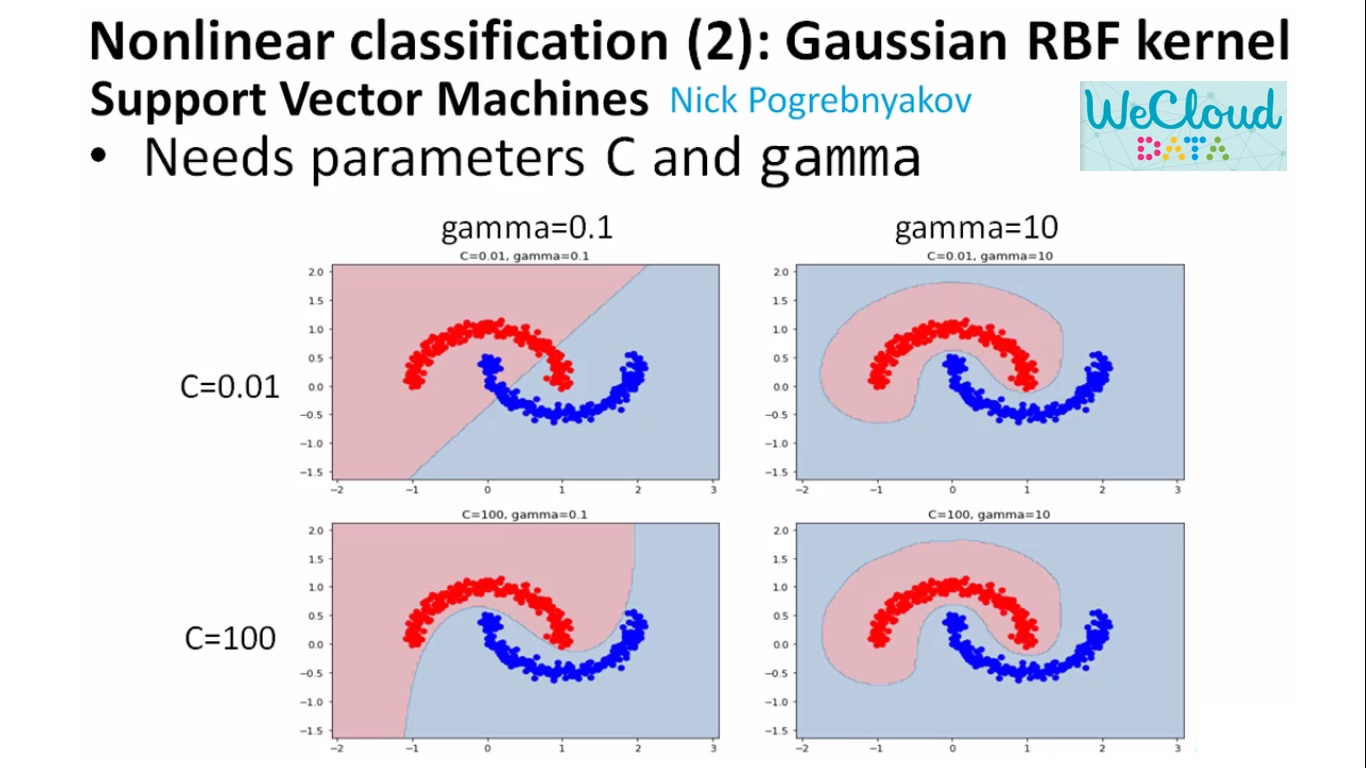

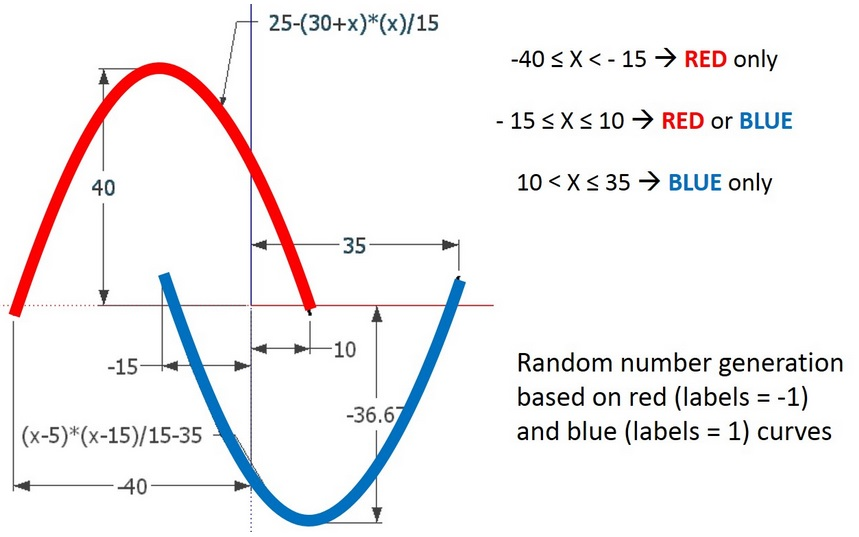

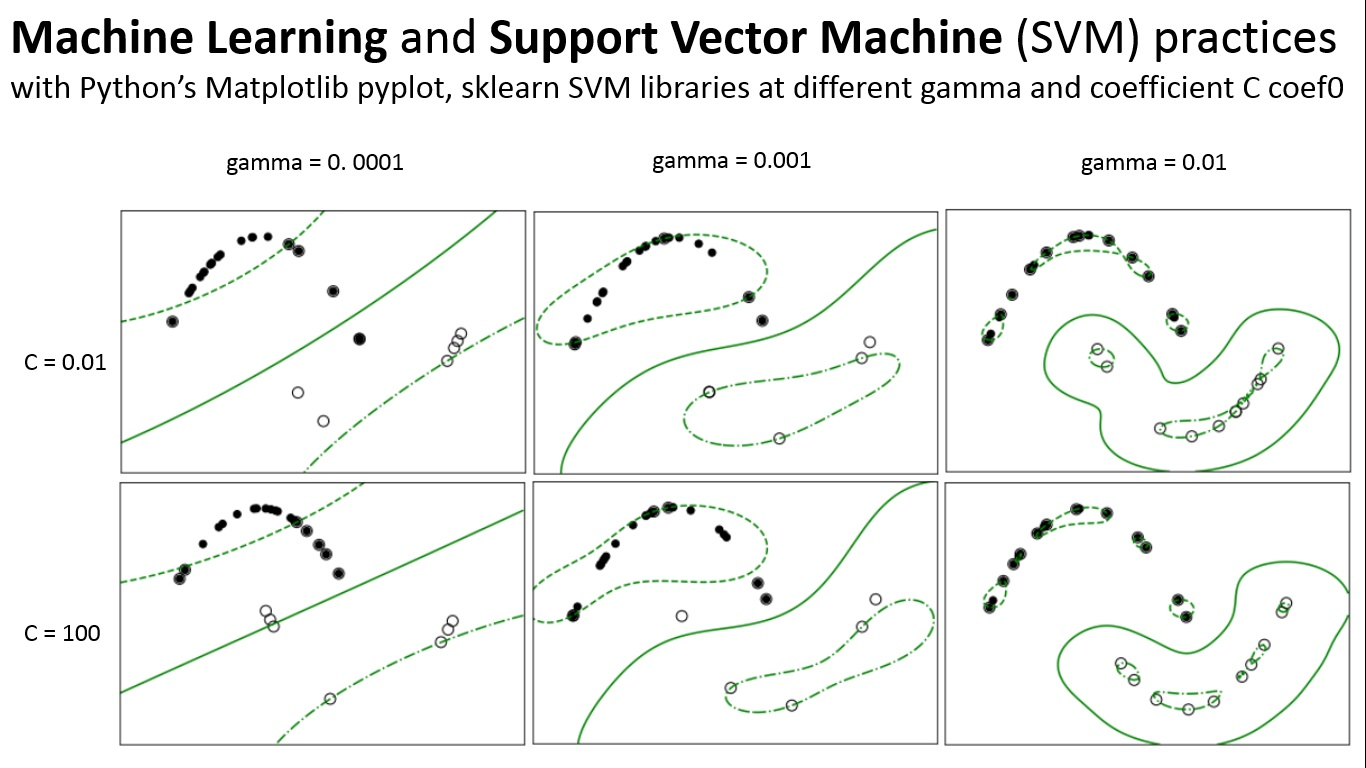

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm  # ScikitLearn practice to visualize rbf Kernel   
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def nonlinear_model(n_samples=80):
    x = 75 * np.random.random(n_samples) - 40        
    y = np.empty((n_samples))                        
    labels = np.empty((n_samples))                   
    data = np.empty((n_samples, 2))
    for a in range(n_samples):
        if x[a] < -15:
            x[a] *= (1+((np.random.rand(1)[0])*10)/100
                     *(2*np.random.randint(0,2)-1))
            y[a] = (25*(1+((np.random.rand(1)[0])*10)/100
                        *(2*np.random.randint(0,2)-1)) - (30+x[a])*x[a]/15)             
            labels[a] = -1                           
        elif x[a] > 10:
            x[a] *= (1+((np.random.rand(1)[0])*10)/100
                     *(2*np.random.randint(0,2)-1))
            y[a] = ((x[a]-5)*(x[a]-15)/15-
                    35*(1+((np.random.rand(1)[0])*10)/100
                      *(2*np.random.randint(0,2)-1)))            
            labels[a] = 1                            
        else:
            labels[a]=(2*np.random.randint(0,2)-1)   
            if labels[a] == -1:
                x[a] *= (1+((np.random.rand(1)[0])*10)/100
                         *(2*np.random.randint(0,2)-1))
                y[a] = (25*(1+((np.random.rand(1)[0])*10)/100
                            *(2*np.random.randint(0,2)-1)) 
                              - (30+x[a])*x[a]/15)        
            else:
                x[a] *= (1+((np.random.rand(1)[0])*10)/100
                         *(2*np.random.randint(0,2)-1))
                y[a] = ((x[a]-5)*(x[a]-15)/15-35
                        *(1+((np.random.rand(1)[0])*10)/100
                          *(2*np.random.randint(0,2)-1)))      
        data[a,0]=x[a]                               
        data[a,1]=y[a]                               

    return data, labels

xa, ya = nonlinear_model()

def func(slider):
  gamma_value = 0.0001*np.exp(0.0461*slider)
  print(" slider {} = gamma of {}".format(slider,gamma_value))

  plt.figure(figsize=(6, 4)); 
  ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
  ax.scatter(xa[:, 0], xa[:, 1], c=ya, cmap=plt.cm.RdYlBu)

  delta = 1
  y_min, y_max = -50, 50
  x_min, x_max = -50, 50

  clf = svm.SVC(kernel='rbf', gamma=gamma_value); clf.fit(xa, ya) 

  ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=100, edgecolors="k", facecolors="none")
  xb = np.arange(x_min, x_max + delta, delta)
  yb = np.arange(y_min, y_max + delta, delta)
  X1, X2 = np.meshgrid(xb, yb)
  Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
  Z = Z.reshape(X1.shape)
  ax.contour(X1, X2, Z, [-1, 0,1], colors='green', 
           linestyles=['dashed', 'solid', 'dotted'])
  plt.show()

interact(func, slider=widgets.IntSlider(min=0,max=100,step=1,value=50));
